<a href="https://colab.research.google.com/github/Blvisse/DataScience/blob/master/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from google.colab import files

In [3]:
files.upload()

Saving winequality-red.csv to winequality-red.csv


{'winequality-red.csv': b'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5\n7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5\n11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5\n7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5\n7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7\n7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n6.7,0.58,0.08,1.8,0.09699999999999999,15.0,65.0,0.9959,3.28,0.54,9.2,5\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n5.6,0.615,0.0,1.6,0.08900000000000001,16.0,59.0,0.9943,3.58,0.52,9.9,5\n7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5\

In [5]:
data=pd.read_csv('winequality-red.csv')

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [11]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


## Using Univariate Selection (KBest for Feature Selection)

In [15]:
bestfeatures=SelectKBest(score_func=chi2, k=10)
fit=bestfeatures.fit(X,y)

In [16]:
datascores=pd.DataFrame(fit.scores_)
datacolumns=pd.DataFrame(X.columns)

In [17]:
featScores= pd.concat([datacolumns,datascores],axis=1)
featScores.columns= ['Features','Score']

In [18]:
featScores

,Features,Score
0,fixed acidity,11.260652
1,volatile acidity,15.580289
2,citric acid,13.025665
3,residual sugar,4.123295
4,chlorides,0.752426
5,free sulfur dioxide,161.936036
6,total sulfur dioxide,2755.557984
7,density,0.000230
8,pH,0.154655
9,sulphates,4.558488


From the above we get the score in relation to the target which in this case is the Quality of the wine.
From the map above: the higher the score the higher the correlation to the target feature.

#Feature Importance

Feature Importance gives a score according to how important the feature is towards the target variable

In [21]:
modelEXTC=ExtraTreesClassifier()

In [22]:
modelEXTC.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [24]:
print(modelEXTC.feature_importances_)

[0.0766263  0.09710839 0.07922532 0.07916488 0.07874646 0.07285584
 0.10432291 0.08481704 0.07574862 0.10396709 0.14741717]


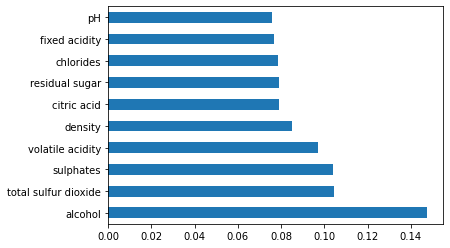

In [29]:
featImportance=pd.Series(modelEXTC.feature_importances_,index=X.columns)
featImportance.nlargest(10).plot(kind='barh')
plt.show()

We can see that the alcohol content in the wine is the most important feature relevant to the target variable.

## Using a Heat Map for Feature Selection 

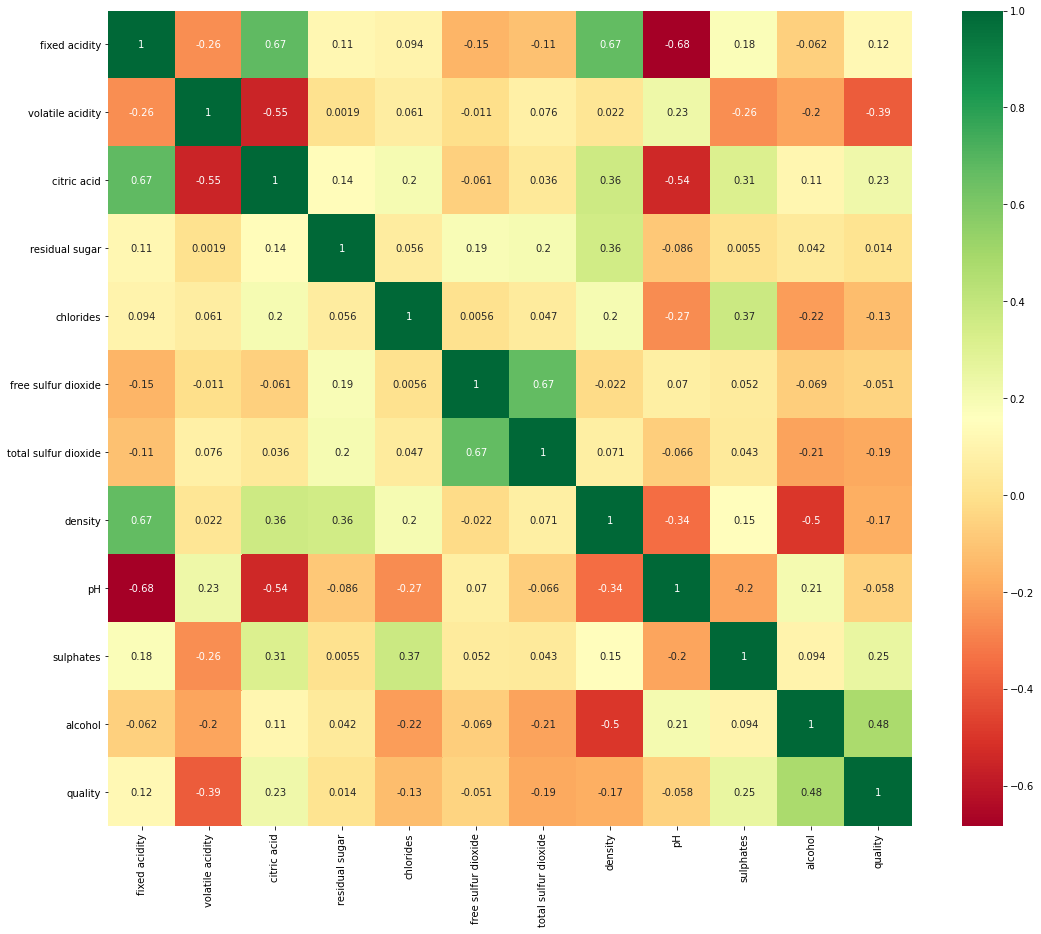

In [31]:
corrmat= data.corr()
topCorr= corrmat.index
plt.figure(figsize=(18,15))
corrPlot=sns.heatmap(data[topCorr].corr(),annot=True,cmap='RdYlGn')